In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
magmo_multi_tran = pd.read_csv('~/Desktop/lv_data/filtered_A_multi_tran.csv')

In [3]:
magmo_multi_tran

,Source name,No._of_Trans,A-Positive,A-Negative,Tot_pairs,Effect_dir,Eff_dir_per
0,188.946+0.886,2,3,0,3,3,1.0
1,189.030+0.783,2,0,2,2,-2,-1.0
2,196.453-1.677,2,0,3,3,-3,-1.0
3,284.351-0.418,2,0,4,4,-4,-1.0
4,285.263-0.050,2,3,0,3,3,1.0
...,...,...,...,...,...,...,...
69,017.638+0.157,3,0,3,3,-3,-1.0
70,018.461-0.004,2,2,0,2,2,1.0
71,018.835-0.300,2,0,3,3,-3,-1.0
72,019.487+0.151,2,2,0,2,2,1.0


In [4]:
filt_multi_tran = magmo_multi_tran[['Source name', 'Tot_pairs', 'Effect_dir', 'Eff_dir_per']]

In [5]:
filt_multi_tran

,Source name,Tot_pairs,Effect_dir,Eff_dir_per
0,188.946+0.886,3,3,1.0
1,189.030+0.783,2,-2,-1.0
2,196.453-1.677,3,-3,-1.0
3,284.351-0.418,4,-4,-1.0
4,285.263-0.050,3,3,1.0
...,...,...,...,...
69,017.638+0.157,3,-3,-1.0
70,018.461-0.004,2,2,1.0
71,018.835-0.300,3,-3,-1.0
72,019.487+0.151,2,2,1.0


In [187]:
import random

Text(0.5, 1.0, 'b-field dir dist')

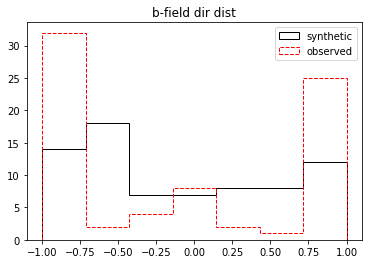

In [203]:
def rand_pair(n):
    rand_tot_pair = np.round(random.randint(-n, n)/n, 1)
    return rand_tot_pair

for index, row in filt_multi_tran.iterrows():
    filt_multi_tran.loc[index, 'rand_eff_dir'] = rand_pair(row['Tot_pairs'])
# filt_multi_tran
bins = 7
fig, ax = plt.subplots(1, sharex=False)
ax.hist(filt_multi_tran['rand_eff_dir'], bins, histtype='step', color='k', label='synthetic', density=False)
ax.hist(filt_multi_tran['Eff_dir_per'], bins, histtype='step', linestyle=('dashed'), color='r', label='observed', density=False)
ax.legend(loc='upper right')
plt.title('b-field dir dist')

In [315]:
filt_multi_tran

,Source name,Tot_pairs,Effect_dir,Eff_dir_per,rand_eff_dir
0,188.946+0.886,3,3,1.0,-0.7
1,189.030+0.783,2,-2,-1.0,0.0
2,196.453-1.677,3,-3,-1.0,-1.0
3,284.351-0.418,4,-4,-1.0,-0.8
4,285.263-0.050,3,3,1.0,0.3
...,...,...,...,...,...
69,017.638+0.157,3,-3,-1.0,-1.0
70,018.461-0.004,2,2,1.0,-0.5
71,018.835-0.300,3,-3,-1.0,-1.0
72,019.487+0.151,2,2,1.0,-0.5


In [305]:
n, p = 4, 0.5
s = np.random.binomial(n, p)
pos, neg = s, n-s
Effect_dir = (pos - neg)/n
Effect_dir

-0.5

In [316]:
def binom_pair(trials):
    binom_gen = np.random.binomial(trials, 0.5)
    pos, neg = binom_gen, trials-binom_gen
    Effect_dir = np.round((pos - neg)/trials, 1)
    return Effect_dir

for index, row in filt_multi_tran.iterrows():
    filt_multi_tran.loc[index, 'binom_eff_dir'] = rand_pair(row['Tot_pairs'])
filt_multi_tran

,Source name,Tot_pairs,Effect_dir,Eff_dir_per,rand_eff_dir,binom_eff_dir
0,188.946+0.886,3,3,1.0,-0.7,-0.7
1,189.030+0.783,2,-2,-1.0,0.0,-1.0
2,196.453-1.677,3,-3,-1.0,-1.0,0.0
3,284.351-0.418,4,-4,-1.0,-0.8,0.8
4,285.263-0.050,3,3,1.0,0.3,0.7
...,...,...,...,...,...,...
69,017.638+0.157,3,-3,-1.0,-1.0,0.0
70,018.461-0.004,2,2,1.0,-0.5,1.0
71,018.835-0.300,3,-3,-1.0,-1.0,0.3
72,019.487+0.151,2,2,1.0,-0.5,1.0


Text(0.5, 1.0, 'b-field dir dist')

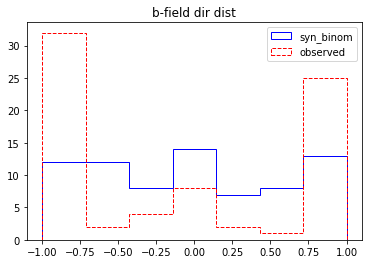

In [325]:
bins = 7
fig, ax = plt.subplots(1, sharex=False)
# ax.hist(filt_multi_tran['rand_eff_dir'], bins, histtype='step', color='k', label='syn_rand', density=False)
ax.hist(filt_multi_tran['binom_eff_dir'], bins, histtype='step', color='b', label='syn_binom', density=False)
ax.hist(filt_multi_tran['Eff_dir_per'], bins, histtype='step', linestyle=('dashed'), color='r', label='observed', density=False)
ax.legend(loc='upper right')
plt.title('b-field dir dist')